In [ ]:
import scipy.io
import pandas as pd

# Load the MATLAB file
data = scipy.io.loadmat('D:/Uni4022/midterm/DATA.mat')


In [ ]:
# Inspecting the content of 'NOV17' and 'NOV9' to determine the structure
data['NOV17'].shape, data['NOV9'].shape

((86400, 17), (86400, 17))

In [ ]:
# Extracting the 'NOV17' data into a DataFrame
nov9_df = pd.DataFrame(data['NOV9'], columns=[
    "Time_stamp", "P1_juice_pressure_inlet", "P2_juice_pressure_outlet", "T_juice_temperature", "F_juice_flow_inlet",
    "CV_control_value", "X_servomotor_rod_displacement", "PV_process_value", "Juice_temperature_inlet",
    "Juice_temperature_outlet", "Juice_density_inlet", "Juice_density_outlet", "Steam_flow",
    "Steam_pressure", "Steam_temperature", "Vapour_pressure", "Vapour_temperature"
])

# Display the first few rows and columns
nov9_df.head(), nov9_df.columns

(   Time_stamp  P1_juice_pressure_inlet  P2_juice_pressure_outlet  \
 0         0.0                    699.1                     300.6   
 1         1.0                    697.7                     298.9   
 2         2.0                    696.2                     301.8   
 3         3.0                    702.8                     300.9   
 4         4.0                    701.3                     292.6   
 
    T_juice_temperature  F_juice_flow_inlet  CV_control_value  \
 0                 97.8               296.2              42.7   
 1                 97.8               295.4              41.8   
 2                 97.8               295.4              42.9   
 3                 97.7               295.1              43.1   
 4                 97.8               294.6              42.6   
 
    X_servomotor_rod_displacement  PV_process_value  Juice_temperature_inlet  \
 0                           42.0              46.1                    129.1   
 1                           41.

In [ ]:
# Extracting the 'NOV17' data into a DataFrame
nov17_df = pd.DataFrame(data['NOV17'], columns=[
    "Time_stamp", "P1_juice_pressure_inlet", "P2_juice_pressure_outlet", "T_juice_temperature", "F_juice_flow_inlet",
    "CV_control_value", "X_servomotor_rod_displacement", "PV_process_value", "Juice_temperature_inlet",
    "Juice_temperature_outlet", "Juice_density_inlet", "Juice_density_outlet", "Steam_flow",
    "Steam_pressure", "Steam_temperature", "Vapour_pressure", "Vapour_temperature"
])

# Display the first few rows and columns
nov17_df.head(), nov17_df.columns


(   Time_stamp  P1_juice_pressure_inlet  P2_juice_pressure_outlet  \
 0         0.0                    642.0                     359.0   
 1         1.0                    635.9                     356.8   
 2         2.0                    638.8                     356.0   
 3         3.0                    637.6                     350.7   
 4         4.0                    635.7                     360.4   
 
    T_juice_temperature  F_juice_flow_inlet  CV_control_value  \
 0                 97.4               351.3              33.9   
 1                 97.4               352.6              35.0   
 2                 97.4               353.4              33.9   
 3                 97.4               354.1              34.4   
 4                 97.4               354.3              33.7   
 
    X_servomotor_rod_displacement  PV_process_value  Juice_temperature_inlet  \
 0                           33.1              47.6                    130.5   
 1                           32.

In [ ]:
fault_data = {
    "Fault_tag": ["f18", "f16", "f18", "f18", "f18", "f16"],
    "Sample_range": ["58800 – 59800", "57275 – 57550", "58830 – 58930", "58520 – 58625", "54600 – 54700", "56670 – 56770"],
    "Date": ["October 30, 2001", "November 9, 2001", "November 9, 2001", "November 9, 2001", "November 17, 2001", "November 17, 2001"],
    "Fault_description": ["Partly opened bypass valve", "Positioner supply pressure drop", "Partly opened bypass valve", "Partly opened bypass valve", "Partly opened bypass valve", "Positioner supply pressure drop"]
}

fault_df = pd.DataFrame(fault_data)

# Extracting start and end of the sample range to apply the labels to the data
fault_df[['Sample_start', 'Sample_end']] = fault_df['Sample_range'].str.split(' – ', expand=True).astype(int)


In [ ]:
fault_df

Fault_tag   Sample_range               Date  \
0       f18  58800 – 59800   October 30, 2001   
1       f16  57275 – 57550   November 9, 2001   
2       f18  58830 – 58930   November 9, 2001   
3       f18  58520 – 58625   November 9, 2001   
4       f18  54600 – 54700  November 17, 2001   
5       f16  56670 – 56770  November 17, 2001   

                 Fault_description  Sample_start  Sample_end  
0       Partly opened bypass valve         58800       59800  
1  Positioner supply pressure drop         57275       57550  
2       Partly opened bypass valve         58830       58930  
3       Partly opened bypass valve         58520       58625  
4       Partly opened bypass valve         54600       54700  
5  Positioner supply pressure drop         56670       56770

In [ ]:
# Nov 9 Fault Data
nov9_fault_data = fault_df.iloc[1:4].copy()
nov9_fault_data[['Sample_start', 'Sample_end']] = nov9_fault_data['Sample_range'].str.split(' – ', expand=True).astype(int)

# Nov 17 Fault Data
nov17_fault_data = fault_df.iloc[4:6].copy()
nov17_fault_data[['Sample_start', 'Sample_end']] = nov17_fault_data['Sample_range'].str.split(' – ', expand=True).astype(int)

# Assigning fault labels to the nov9_df
labels_nov9 = pd.Series(["Normal"] * len(data['NOV9']))

for i, row in nov9_fault_data.iterrows():
    labels_nov9[row['Sample_start']:row['Sample_end'] + 1] = row['Fault_tag']

nov9_df = pd.DataFrame(data['NOV9'], columns=[
    "Time_stamp", "P1_juice_pressure_inlet", "P2_juice_pressure_outlet", "T_juice_temperature", "F_juice_flow_inlet",
    "CV_control_value", "X_servomotor_rod_displacement", "PV_process_value", "Juice_temperature_inlet",
    "Juice_temperature_outlet", "Juice_density_inlet", "Juice_density_outlet", "Steam_flow",
    "Steam_pressure", "Steam_temperature", "Vapour_pressure", "Vapour_temperature"
])
nov9_df['Label'] = labels_nov9

# Assigning fault labels to the nov17_df
labels_nov17 = pd.Series(["Normal"] * len(data['NOV17']))

for i, row in nov17_fault_data.iterrows():
    labels_nov17[row['Sample_start']:row['Sample_end'] + 1] = row['Fault_tag']

nov17_df['Label'] = labels_nov17

In [ ]:
nov9_df.head(), nov9_df['Label'].value_counts()

(   Time_stamp  P1_juice_pressure_inlet  P2_juice_pressure_outlet  \
 0         0.0                    699.1                     300.6   
 1         1.0                    697.7                     298.9   
 2         2.0                    696.2                     301.8   
 3         3.0                    702.8                     300.9   
 4         4.0                    701.3                     292.6   
 
    T_juice_temperature  F_juice_flow_inlet  CV_control_value  \
 0                 97.8               296.2              42.7   
 1                 97.8               295.4              41.8   
 2                 97.8               295.4              42.9   
 3                 97.7               295.1              43.1   
 4                 97.8               294.6              42.6   
 
    X_servomotor_rod_displacement  PV_process_value  Juice_temperature_inlet  \
 0                           42.0              46.1                    129.1   
 1                           41.

In [ ]:
nov17_df.head(), nov17_df['Label'].value_counts()

(   Time_stamp  P1_juice_pressure_inlet  P2_juice_pressure_outlet  \
 0         0.0                    642.0                     359.0   
 1         1.0                    635.9                     356.8   
 2         2.0                    638.8                     356.0   
 3         3.0                    637.6                     350.7   
 4         4.0                    635.7                     360.4   
 
    T_juice_temperature  F_juice_flow_inlet  CV_control_value  \
 0                 97.4               351.3              33.9   
 1                 97.4               352.6              35.0   
 2                 97.4               353.4              33.9   
 3                 97.4               354.1              34.4   
 4                 97.4               354.3              33.7   
 
    X_servomotor_rod_displacement  PV_process_value  Juice_temperature_inlet  \
 0                           33.1              47.6                    130.5   
 1                           32.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the nov9_df into training and validation sets
train_df, val_df = train_test_split(nov9_df, test_size=0.2, random_state=64, stratify=nov9_df['Label'])
test_df = nov17_df
# Display the size of each dataset
train_size = len(train_df)
val_size = len(val_df)
test_size = len(nov17_df)

(train_size, val_size, test_size), train_df['Label'].value_counts(), val_df['Label'].value_counts(), nov17_df['Label'].value_counts()

((69120, 17280, 86400),
 Label
 Normal    68734
 f16         221
 f18         165
 Name: count, dtype: int64,
 Label
 Normal    17183
 f16          55
 f18          42
 Name: count, dtype: int64,
 Label
 Normal    86198
 f18         101
 f16         101
 Name: count, dtype: int64)

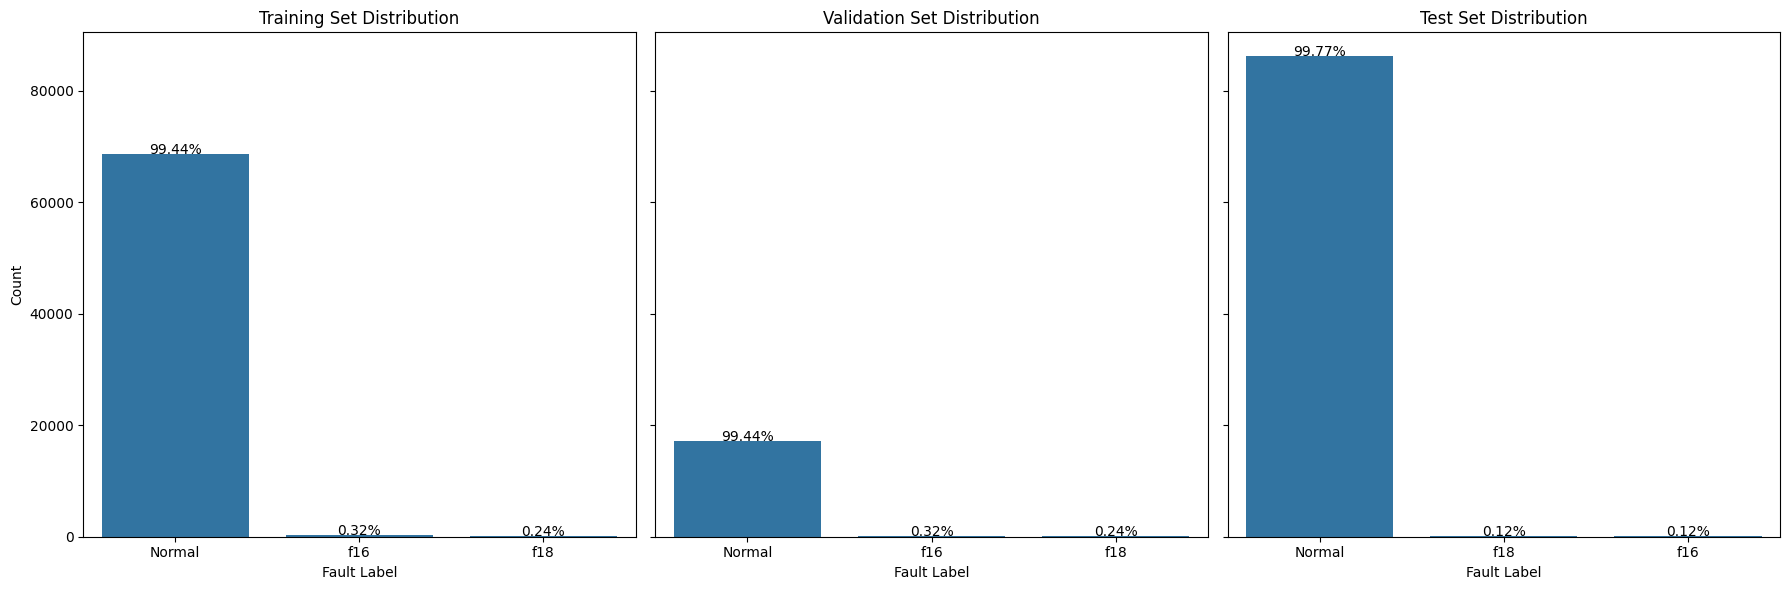

(Label
 Normal    99.441551
 f16        0.319734
 f18        0.238715
 Name: proportion, dtype: float64,
 Label
 Normal    99.438657
 f16        0.318287
 f18        0.243056
 Name: proportion, dtype: float64,
 Label
 Normal    99.766204
 f18        0.116898
 f16        0.116898
 Name: proportion, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the percentage of each class in the training, validation, and test sets
train_class_percentage = train_df['Label'].value_counts(normalize=True) * 100
val_class_percentage = val_df['Label'].value_counts(normalize=True) * 100
test_class_percentage = nov17_df['Label'].value_counts(normalize=True) * 100

# Plotting the distribution of fault labels with percentages
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Training set
sns.countplot(ax=axes[0], data=train_df, x='Label')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 3,
                 f'{height/len(train_df)*100:.2f}%', ha="center")
axes[0].set_title('Training Set Distribution')
axes[0].set_xlabel('Fault Label')
axes[0].set_ylabel('Count')

# Validation set
sns.countplot(ax=axes[1], data=val_df, x='Label')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 3,
                 f'{height/len(val_df)*100:.2f}%', ha="center")
axes[1].set_title('Validation Set Distribution')
axes[1].set_xlabel('Fault Label')
axes[1].set_ylabel('Count')

# Test set
sns.countplot(ax=axes[2], data=nov17_df, x='Label')
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 3,
                 f'{height/len(nov17_df)*100:.2f}%', ha="center")
axes[2].set_title('Test Set Distribution')
axes[2].set_xlabel('Fault Label')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

(train_class_percentage, val_class_percentage, test_class_percentage)

In [ ]:
# Re-defining the feature extraction functions
def calculate_derivatives(df, cols):
    derivatives = df[cols].diff().fillna(0)
    derivatives.columns = [col + '_derivative' for col in cols]
    return derivatives

def calculate_moving_statistics(df, cols, window=10):
    moving_avg = df[cols].rolling(window=window).mean().fillna(0)
    moving_std = df[cols].rolling(window=window).std().fillna(0)
    moving_var = df[cols].rolling(window=window).var().fillna(0)
    moving_avg.columns = [col + '_moving_avg' for col in cols]
    moving_std.columns = [col + '_moving_std' for col in cols]
    moving_var.columns = [col + '_moving_var' for col in cols]
    return pd.concat([moving_avg, moving_std, moving_var], axis=1)

def calculate_ratios_differences(df, col_pairs):
    ratios = pd.DataFrame()
    differences = pd.DataFrame()
    for (col1, col2) in col_pairs:
        ratios[col1 + '_to_' + col2 + '_ratio'] = df[col1] / df[col2]
        differences[col1 + '_minus_' + col2 + '_diff'] = df[col1] - df[col2]
    return pd.concat([ratios, differences], axis=1)

def calculate_cumulative_metrics(df, cols):
    cumulative_sum = df[cols].cumsum().fillna(0)
    cumulative_sum.columns = [col + '_cumulative' for col in cols]
    return cumulative_sum

def create_binary_indicators(df, thresholds):
    indicators = pd.DataFrame()
    for col, threshold in thresholds.items():
        indicators[col + '_binary'] = (df[col] > threshold).astype(int)
    return indicators

def normalize_values(df, cols, ranges):
    normalized = pd.DataFrame()
    for col in cols:
        min_val, max_val = ranges[col]
        normalized[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)
    return normalized

def calculate_control_performance(df, setpoint_col, actual_col):
    performance = df[actual_col] - df[setpoint_col]
    performance.name = actual_col + '_performance'
    return performance

def calculate_correlations(df, cols):
    return df[cols].corr()

def create_event_markers(df, cols, threshold):
    events = pd.DataFrame()
    for col in cols:
        events[col + '_event'] = (df[col].diff().abs() > threshold).astype(int)
    return events

# Function to extract features for a given DataFrame
def extract_features(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[1:]  # Exclude non-numeric columns and the first column (Time_stamp)
    derivatives = calculate_derivatives(df, numeric_cols)
    moving_statistics = calculate_moving_statistics(df, numeric_cols)
    ratios_differences = calculate_ratios_differences(df, [('P1_juice_pressure_inlet', 'P2_juice_pressure_outlet'),
                                                           ('Juice_temperature_inlet', 'Juice_temperature_outlet')])
    cumulative_metrics = calculate_cumulative_metrics(df, ['F_juice_flow_inlet', 'Steam_flow'])
    binary_indicators = create_binary_indicators(df, {'P1_juice_pressure_inlet': 800, 'T_juice_temperature': 120})

    control_performance = calculate_control_performance(df, 'CV_control_value', 'PV_process_value')
    correlations = calculate_correlations(df, numeric_cols)
    # event_markers = create_event_markers(df, numeric_cols, threshold=5)

    features_df = pd.concat([df, derivatives, moving_statistics, ratios_differences,
                             cumulative_metrics, binary_indicators,
                             control_performance], axis=1)
    return features_df

# Extracting features for training, validation, and test sets
features_train_df = extract_features(train_df)
features_val_df = extract_features(val_df)
features_test_df = extract_features(test_df)


In [ ]:
# Check for missing values in the training, validation, and test sets
missing_values_train = features_train_df.isnull().sum()
missing_values_val = features_val_df.isnull().sum()
missing_values_test = features_test_df.isnull().sum()

# Filtering out columns with missing values
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_val = missing_values_val[missing_values_val > 0]
missing_values_test = missing_values_test[missing_values_test > 0]

print("Missing Values in Training Set:\n", missing_values_train)
print("Missing Values in Validation Set:\n", missing_values_val)
print("Missing Values in Test Set:\n", missing_values_test)


Missing Values in Training Set:
 Series([], dtype: int64)
Missing Values in Validation Set:
 Series([], dtype: int64)
Missing Values in Test Set:
 Series([], dtype: int64)


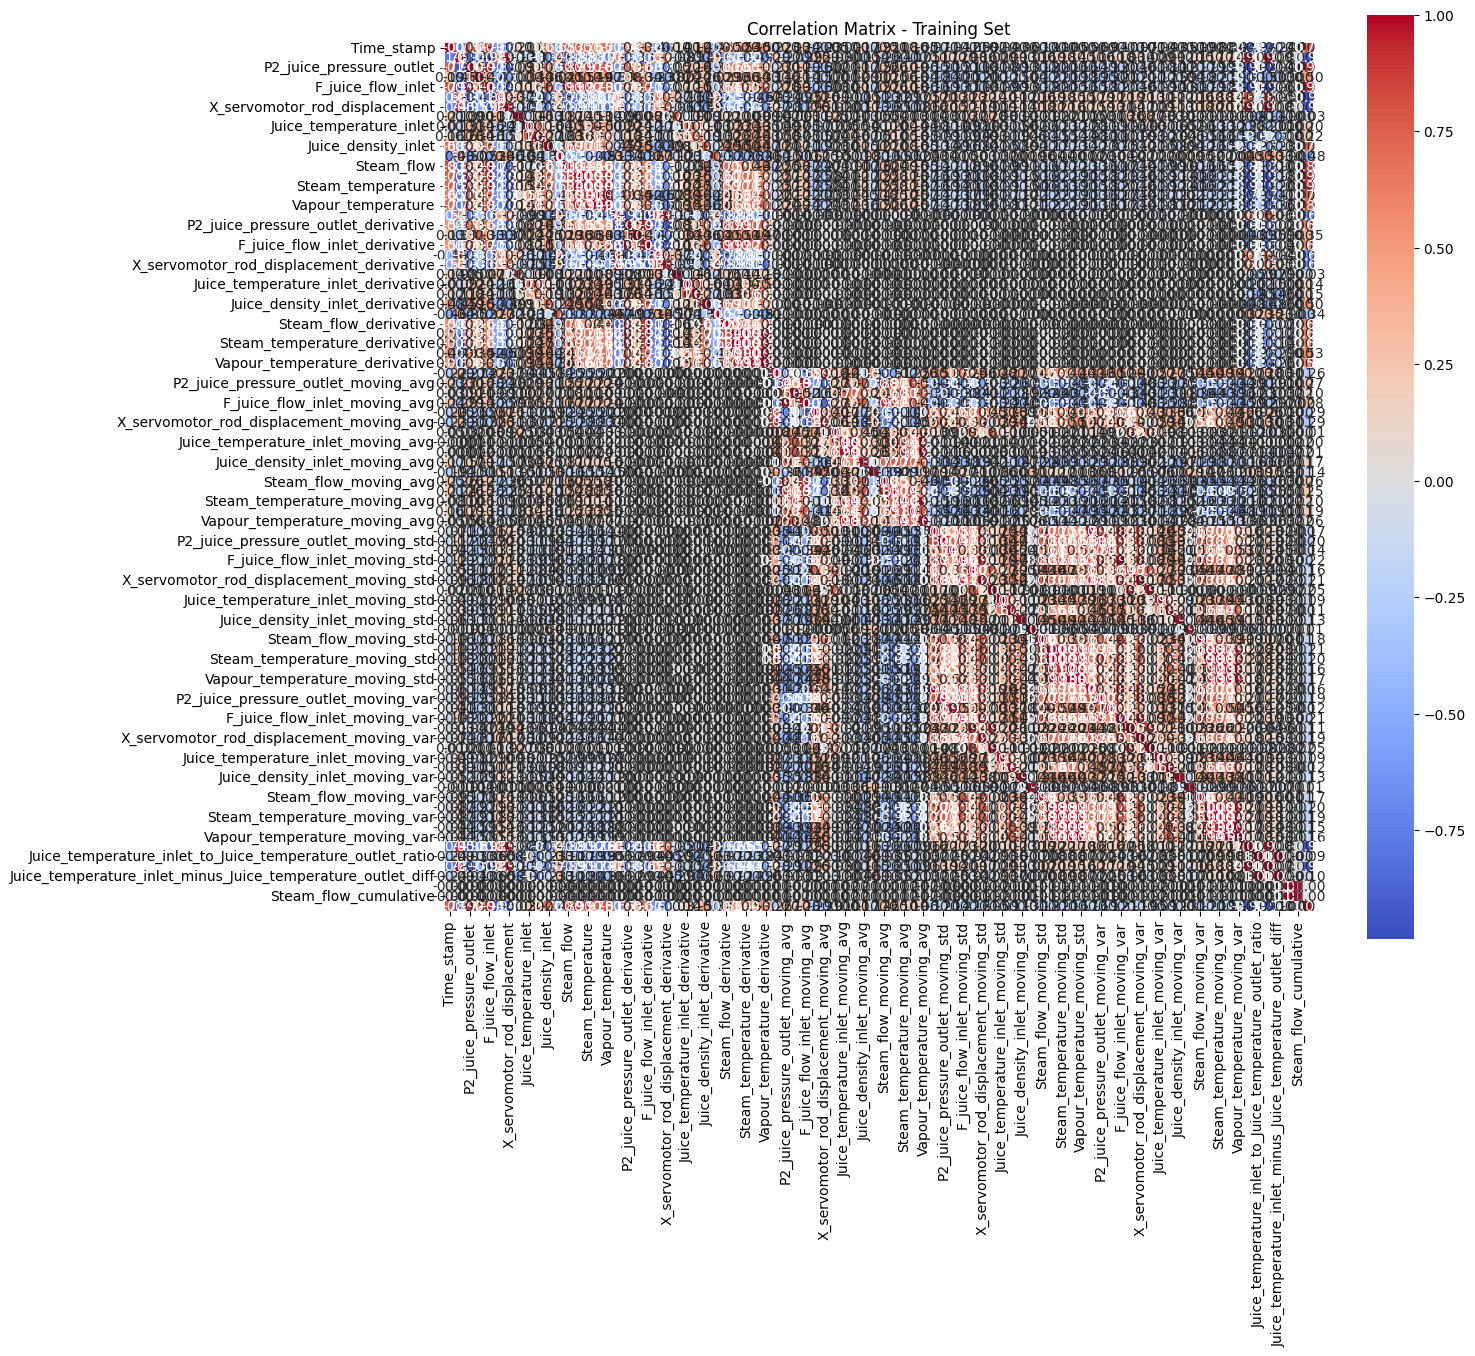

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for the correlation matrix
numeric_cols_train = features_train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix_train = features_train_df[numeric_cols_train].corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix - Training Set")
plt.show()

Dropped features: ['P2_juice_pressure_outlet', 'F_juice_flow_inlet', 'X_servomotor_rod_displacement', 'Steam_flow', 'Steam_pressure', 'Steam_temperature', 'Vapour_pressure', 'Vapour_temperature', 'P2_juice_pressure_outlet_derivative', 'F_juice_flow_inlet_derivative', 'X_servomotor_rod_displacement_derivative', 'Steam_flow_derivative', 'Steam_pressure_derivative', 'Steam_temperature_derivative', 'Vapour_pressure_derivative', 'Vapour_temperature_derivative', 'F_juice_flow_inlet_moving_avg', 'X_servomotor_rod_displacement_moving_avg', 'Juice_temperature_outlet_moving_avg', 'Steam_flow_moving_avg', 'Steam_pressure_moving_avg', 'Steam_temperature_moving_avg', 'Vapour_pressure_moving_avg', 'Vapour_temperature_moving_avg', 'F_juice_flow_inlet_moving_std', 'X_servomotor_rod_displacement_moving_std', 'Steam_temperature_moving_std', 'Vapour_pressure_moving_std', 'Vapour_temperature_moving_std', 'P1_juice_pressure_inlet_moving_var', 'P2_juice_pressure_outlet_moving_var', 'T_juice_temperature_movi

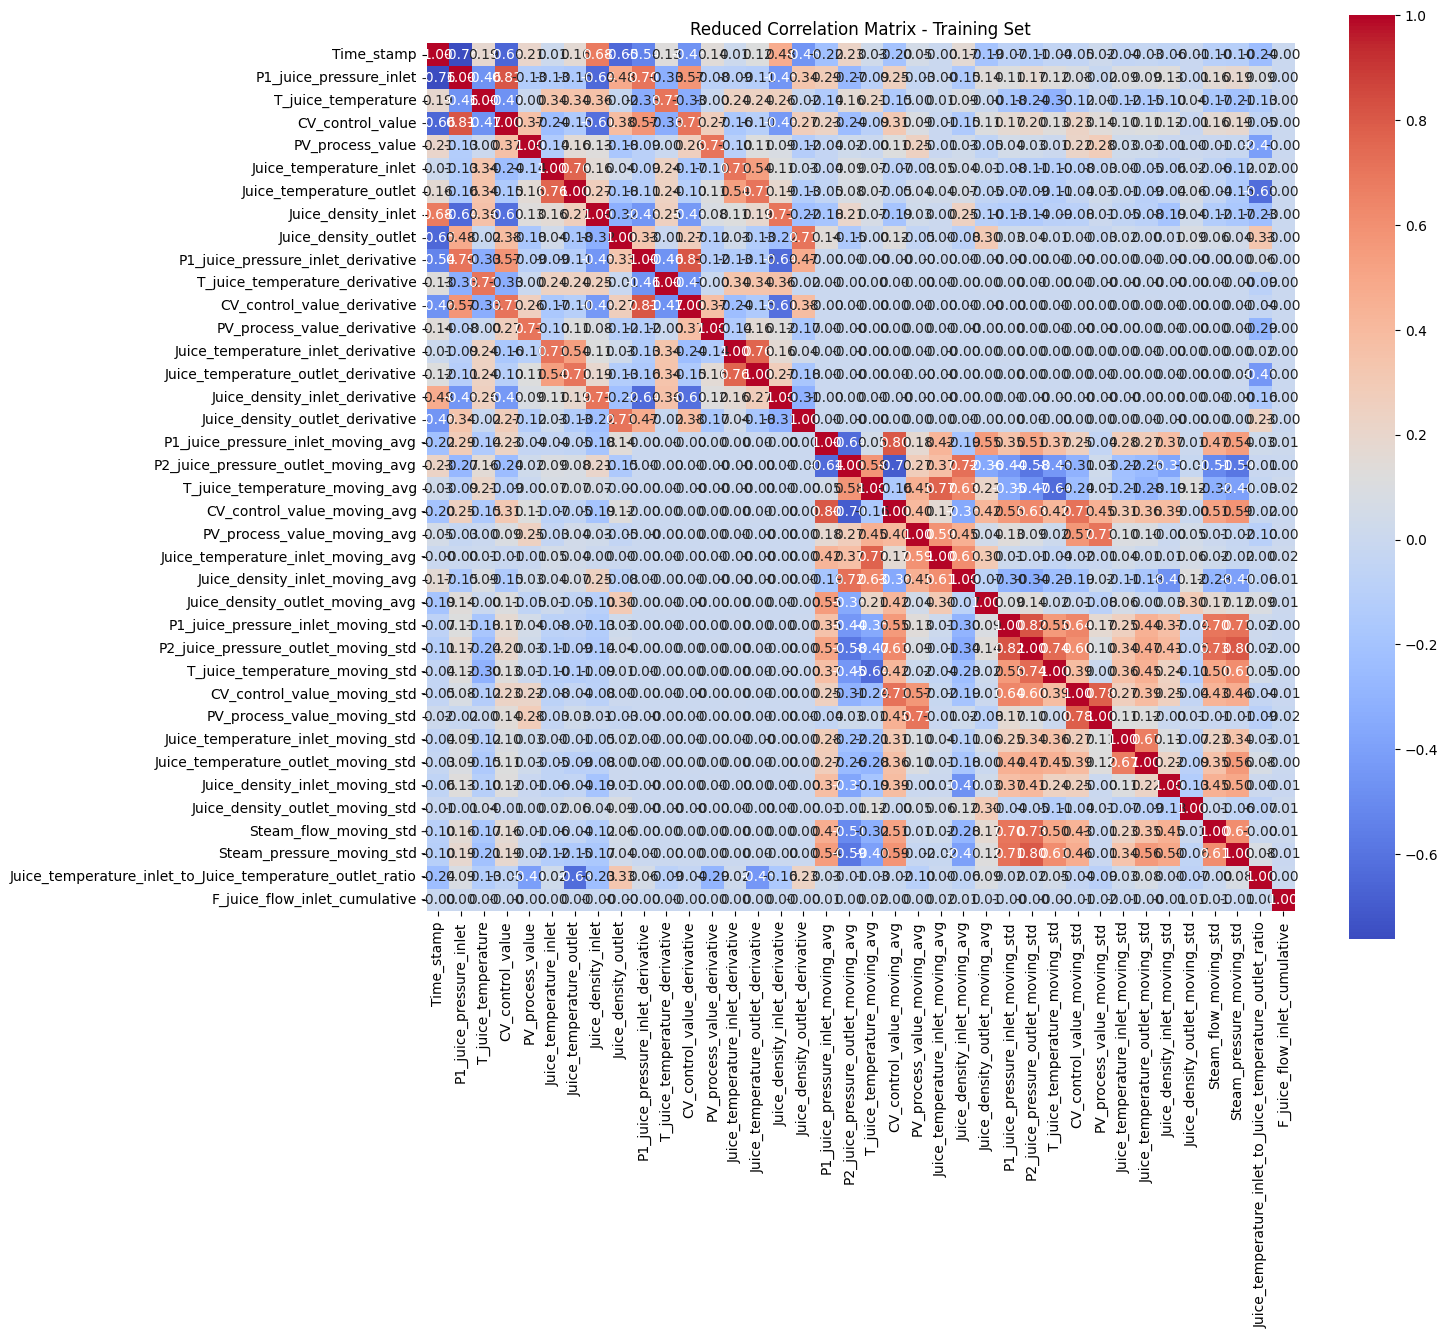

Original shape: (69120, 91)
Reduced shape: (69120, 41)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = features_train_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = features_train_df[numeric_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
features_train_df_reduced = features_train_df.drop(columns=to_drop)
features_val_df_reduced = features_val_df.drop(columns=to_drop)
features_test_df_reduced = features_test_df.drop(columns=to_drop)

print("Dropped features:", to_drop)

# Re-select only numeric columns after dropping highly correlated features
numeric_cols_reduced = features_train_df_reduced.select_dtypes(include=['float64', 'int64']).columns

# Plot the reduced correlation matrix for the training set
corr_matrix_reduced = features_train_df_reduced[numeric_cols_reduced].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_reduced, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Reduced Correlation Matrix - Training Set")
plt.show()

# Checking the shape of the dataframes before and after dropping columns
print("Original shape:", features_train_df.shape)
print("Reduced shape:", features_train_df_reduced.shape)


In [ ]:
features_test_df

Time_stamp  P1_juice_pressure_inlet  P2_juice_pressure_outlet  \
0             0.0                    642.0                     359.0   
1             1.0                    635.9                     356.8   
2             2.0                    638.8                     356.0   
3             3.0                    637.6                     350.7   
4             4.0                    635.7                     360.4   
...           ...                      ...                       ...   
86395     86395.0                    661.1                     383.6   
86396     86396.0                    669.6                     363.4   
86397     86397.0                    664.2                     372.6   
86398     86398.0                    670.3                     362.9   
86399     86399.0                    665.9                     363.1   

       T_juice_temperature  F_juice_flow_inlet  CV_control_value  \
0                     97.4               351.3              33.9   
1                     97.4               352.6              35.0   
2                     97.4               353.4              33.9   
3                     97.4               354.1              34.4   
4                     97.4               354.3              33.7   
...                    ...                 ...               ...   
86395                 96.0               367.9              34.0   
86396                 96.0               366.1              33.8   
86397                 96.0               363.0              34.4   
86398                 96.0               361.5              33.9   
86399                 96.0               361.1              34.2   

       X_servomotor_rod_displacement  PV_process_value  \
0                               33.1              47.6   
1                               32.9              47.0   
2                               34.0              47.4   
3                               33.3              46.8   
4                               33.3              47.4   
...                              ...               ...   
86395                           32.9              48.3   
86396                           32.7              48.0   
86397                           32.9              48.5   
86398                           32.9              47.9   
86399                           34.4              48.2   

       Juice_temperature_inlet  Juice_temperature_outlet  ...  \
0                        130.5                     134.6  ...   
1                        130.5                     134.6  ...   
2                        130.5                     134.6  ...   
3                        130.5                     134.6  ...   
4                        130.5                     134.6  ...   
...                        ...                       ...  ...   
86395                    130.6                     134.5  ...   
86396                    130.6                     134.5  ...   
86397                    130.6                     134.5  ...   
86398                    130.6                     134.5  ...   
86399                    130.6                     134.5  ...   

       Vapour_temperature_moving_var  \
0                              0.000   
1                              0.000   
2                              0.000   
3                              0.000   
4                              0.000   
...                              ...   
86395                          0.000   
86396                          0.000   
86397                          0.000   
86398                          0.000   
86399                          0.001   

       P1_juice_pressure_inlet_to_P2_juice_pressure_outlet_ratio  \
0                                               1.788301           
1                                               1.782231           
2                                               1.794382           
3                                               1.818078           
4                         

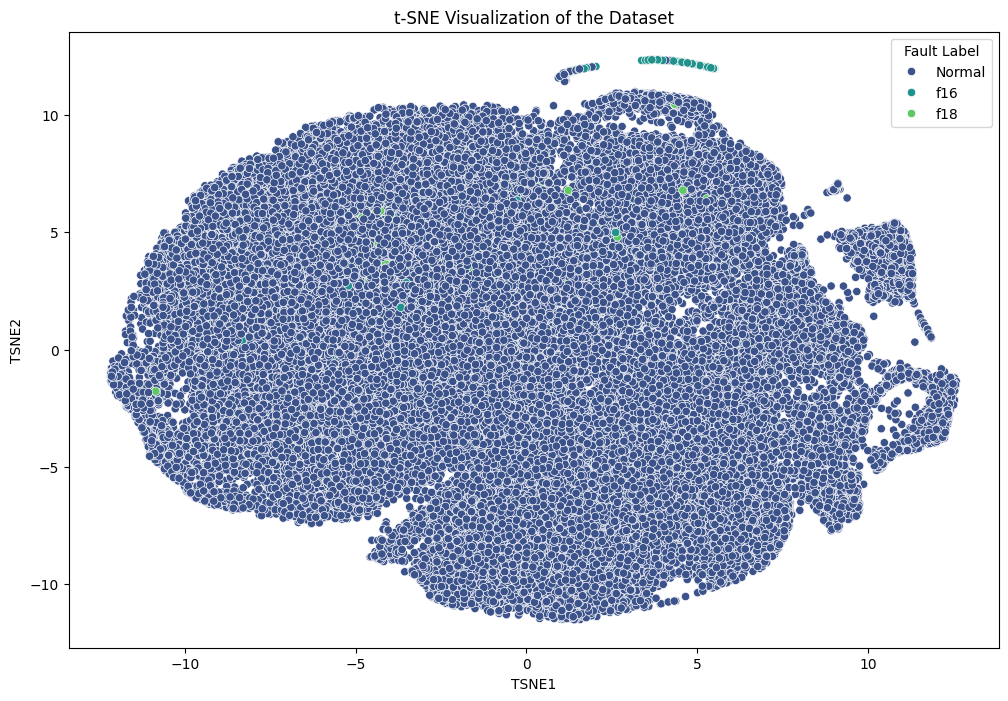

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# We will exclude the 'Label' column for PCA and t-SNE
numeric_cols_reduced = features_train_df_reduced.select_dtypes(include=['float64', 'int64']).columns
X_train = features_train_df_reduced[numeric_cols_reduced]
y_train = features_train_df_reduced['Label']

scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)
# Perform PCA to reduce the dimensionality to 50 dimensions
pca = PCA(n_components=10, random_state=64)
X_pca = pca.fit_transform(X_train)

# Apply t-SNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=64)
X_tsne = tsne.fit_transform(X_pca)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Label'] = y_train.values

# Plotting the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Label', palette='viridis')
plt.title('t-SNE Visualization of the Dataset')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Label')
plt.show()